In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

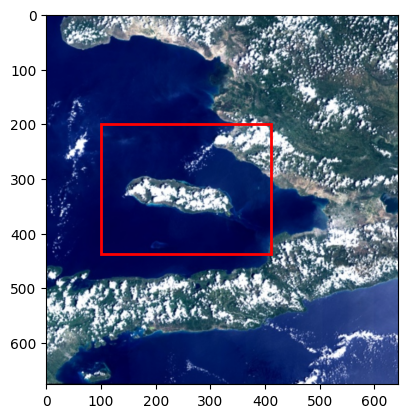

In [25]:
# Load the provided resized image
image = plt.imread("test.png")

# Resized and original image dimensions
resized_width, resized_height = image.shape[1], image.shape[0]
# 7711/(cos 10° + cos 80°) = 6656.2739
# 7541/(cos 10° + cos 80°) = 6509.5268
original_width, original_height = 6509.5268, 6656.2739

# Calculate scaling factors
width_scale = resized_width / original_width
height_scale = resized_height / original_height

# GSD and rectangle dimensions
GSD = 30  # in meters

# Manually enter this: camera image swath H x V
rectangle_width_km = 94.68
rectangle_height_km = 70.2

# Convert rectangle dimensions from kilometers to meters
rectangle_width_m = rectangle_width_km * 1000
rectangle_height_m = rectangle_height_km * 1000

# Determine the rectangle dimensions in pixels for the original image
rectangle_width_pixels_original = rectangle_width_m / GSD
rectangle_height_pixels_original = rectangle_height_m / GSD

# Adjust the rectangle dimensions for the resized image
rectangle_width_pixels_resized = rectangle_width_pixels_original * width_scale
rectangle_height_pixels_resized = rectangle_height_pixels_original * height_scale

# Plotting
fig, ax = plt.subplots()
ax.imshow(image, cmap='gray')

# Assuming the rectangle's top-left corner starts at (0,0)
rect = plt.Rectangle((100, 200), rectangle_width_pixels_resized, rectangle_height_pixels_resized, linewidth=2, edgecolor='r', facecolor='none')
ax.add_patch(rect)

plt.show()